In [6]:
import kagglehub
# Download latest version
path = kagglehub.dataset_download("ns0720/tempscsv", force_download=True)

print("Path to dataset files:", path)


100%|██████████| 3.71k/3.71k [00:00<00:00, 3.77MB/s]

Extracting model files...
Path to dataset files: /home/kason/.cache/kagglehub/datasets/ns0720/tempscsv/versions/1


In [16]:
import os

# 打开文件夹里的文件，查看有哪些文件
for file in os.listdir(path):
    print(file)


print(file, path)
file_path = os.path.join(path, file)
with open(file_path, "r") as f:
    content = f.read()
    with open("data/temps.csv", "w") as f:
        f.write(content)
        f.close()
        # remove the directory in the original path, if the directory is not empty, we should remove it too
        os.remove(file_path)
        os.rmdir(path)
        

temps.csv
temps.csv /home/kason/.cache/kagglehub/datasets/ns0720/tempscsv/versions/1


# 解释数据集
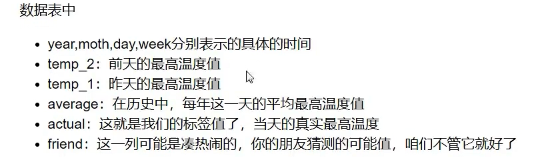

In [3]:
import pandas as pd
features = pd.read_csv("data/temps.csv")
features.head()

,year,month,day,week,temp_2,temp_1,average,actual,friend
0,2019,1,1,Fri,45,45,45.6,45,29
1,2019,1,2,Sat,44,45,45.7,44,61
2,2019,1,3,Sun,45,44,45.8,41,56
3,2019,1,4,Mon,44,41,45.9,40,53
4,2019,1,5,Tues,41,40,46.0,44,41


In [4]:
print(f"shape: {features.shape}")

shape: (348, 9)


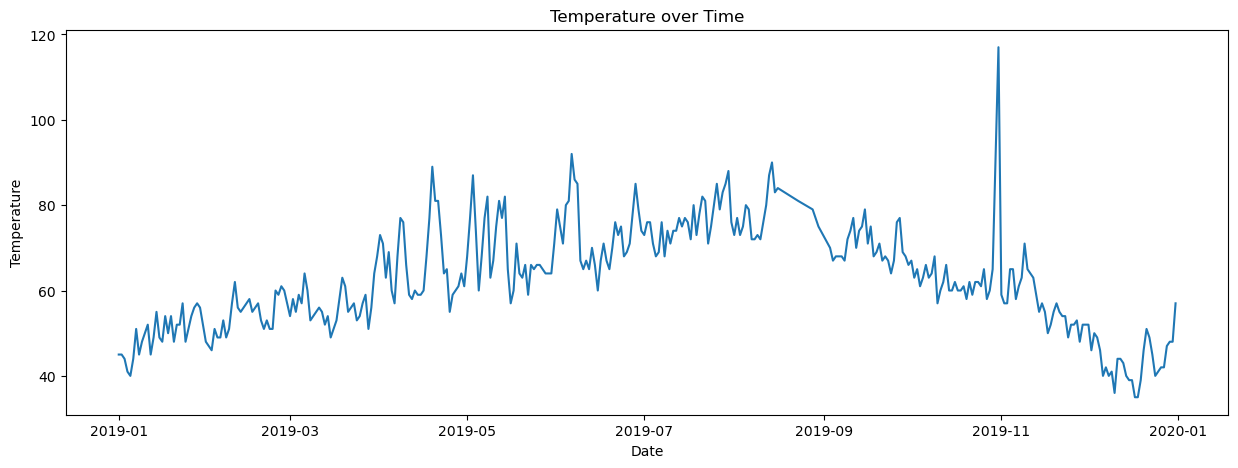

In [5]:
# 画图
import matplotlib.pyplot as plt

features['date'] = pd.to_datetime(features[['year', 'month', 'day']])

plt.figure(figsize=(15, 5))
plt.plot(features["date"], features["temp_1"])
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('Temperature over Time')
plt.show()
